In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def save(xs, ys, name, scale=100):
    f = open(name if name.endswith(".svg") else name + ".svg", "w")
    minx = min(map(min, xs))
    miny = min(map(min, ys))
    xs = [scale*(x - minx) for x in xs]
    ys = [scale*(y - miny) for y in ys]

    maxx = max(map(max, xs))
    maxy = max(map(max, ys))

    print("size:", maxx, maxy)

    f.write(f"""<?xml version=\"1.0\" standalone=\"no\"?>
    <!DOCTYPE svg PUBLIC \"-//W3C//DTD SVG 1.1//EN\"
    \"http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd\">
    <svg height=\"{maxy}mm\" width=\"{maxx}mm\"
    xmlns=\"http://www.w3.org/2000/svg\" version=\"1.1\"
    viewBox=\"0 0 {maxx} {maxy}\">
    """)

    for px, py in zip(xs, ys):
        f.write("<polyline points=\"")
        f.write("\n".join(f"{xx},{yy}" for xx, yy in zip(px, py)))
        f.write("\" fill=\"none\" stroke=\"black\" stroke-width=\"0.5\"/>\n")

    f.write("</svg>")


def show(xs, ys):
    plt.rcParams["figure.figsize"] = (8,8)
    plt.axis('equal')
    for (x,y) in zip(xs,ys):
        plt.plot(x, y, "black")
    plt.show()

def show_decomposed(xs, ys):
    plt.rcParams["figure.figsize"] = (10,10)
    plt.axis('equal')
    for (x,y) in zip(xs,ys):
        plt.figure(figsize=(6, 6))
        plt.plot(x, y, "black")
    plt.show()

def rot_mat(angle):
  # Define the rotation matrix
  theta = np.radians(angle)
  c, s = np.cos(theta), np.sin(theta)
  R = np.array(((c, -s), (s, c)))
  return R


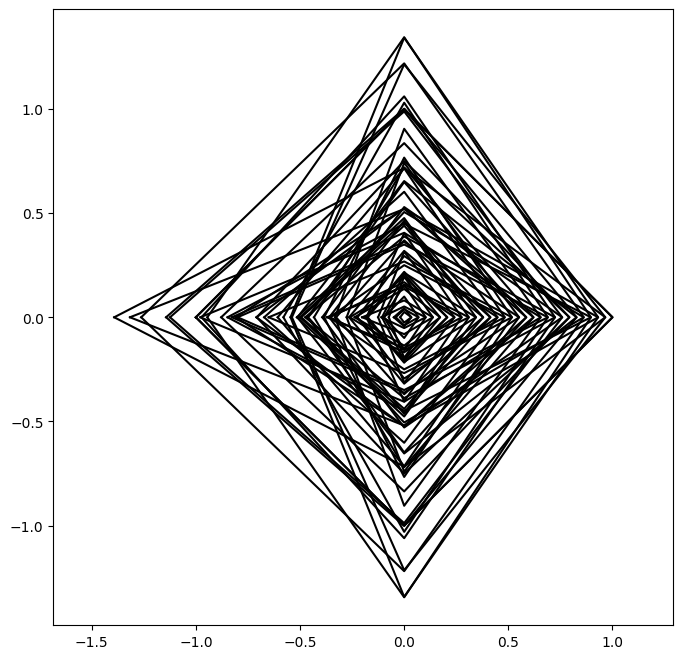

size: 239.20402973187703 268.8340302073421


In [3]:
N = 30
K = 5
M = 5


xs = []
ys = []
R = rot_mat(180)
for i, r0 in enumerate(np.linspace(0, 1, N)):
    # alpha = np.linspace(-np.pi*0.95, np.pi*0.95, K)
    alpha = np.linspace(-np.pi, np.pi, K)
    r = r0 * (1 + 0.5*np.sin(2*alpha * M*r0))
    x, y = r * np.cos(alpha), r*np.sin(alpha)
    x1, y1 = R @ [x,y]
    xs.append(x)
    xs.append(-x1)
    ys.append(y)
    ys.append(y1)

show(xs, ys)
save(xs, ys, "sierra_raute_faat")